# FINAL NOTEBOOK
# Programmer's name: Savannah Gourley
# For my portion of labor, I will be analyzing low birth weight in SPAs 4 and 5 using CalEnviroScreen data and merging it with my group member, Maya Coronado's, SPA data. I will be also be producing the top 10 census tracts with the highest and lowest rates of low birth weight in order for all of my group members to use.



In [ ]:
#Research Question: What contributes to food security and associated health outcomes at the community level in Los Angeles County?

In [1]:
###importing pandas/geopandas/folium/matplot/contextily
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
#importing CalEnviroScreen data containing Low Birth Weight data

In [2]:
calen2 = pd.read_excel('lbw data/CalEnviroscreen edited.xlsx')

In [3]:
#checking what the data is looking like 
calen2.head()

,Keep,Keep.1,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,0,6037204920,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
1,0,6037542402,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,...,NaN,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46
2,0,6037543202,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,...,60.62,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90
3,0,6037203300,6037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,77.35,...,94.87,71.7,97.95,11.9,91.94,28.3,87.49,82.01,8.51,94.49
4,0,6037291220,6037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,77.25,...,86.75,51.5,83.49,4.5,37.71,26.1,82.79,74.47,7.73,86.01


In [ ]:
#Leading zero problem per usual, let's fix that

In [4]:
calen2 = pd.read_excel(
    'lbw data/CalEnviroscreen edited.xlsx',
    dtype=
    {
        'Keep':str,
        'Census Tract':str
    }
)

In [5]:
#checking again
calen2.head()

,Keep,Keep.1,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,0,6037204920,06037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
1,0,6037542402,06037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,...,NaN,43.5,74.05,9.3,83.22,23.7,76.35,83.37,8.65,95.46
2,0,6037543202,06037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,79.29,...,60.62,56.8,88.92,12.6,93.49,29.6,89.84,85.44,8.86,96.90
3,0,6037203300,06037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,77.35,...,94.87,71.7,97.95,11.9,91.94,28.3,87.49,82.01,8.51,94.49
4,0,6037291220,06037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,77.25,...,86.75,51.5,83.49,4.5,37.71,26.1,82.79,74.47,7.73,86.01


In [6]:
#taking a peak at the dataset...looks like there is no missing data
calen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Keep                         2280 non-null   object 
 1   Keep.1                       2280 non-null   object 
 2   Census Tract                 2280 non-null   object 
 3   Total Population             2280 non-null   int64  
 4   California County            2280 non-null   object 
 5   ZIP                          2280 non-null   int64  
 6   Approximate Location         2280 non-null   object 
 7   Longitude                    2280 non-null   float64
 8   Latitude                     2280 non-null   float64
 9   CES 4.0 Score                2280 non-null   float64
 10  CES 4.0 Percentile           2280 non-null   float64
 11  CES 4.0 Percentile Range     2280 non-null   object 
 12  Ozone                        2280 non-null   float64
 13  Ozone Pctl        

In [7]:
# defining columns to keep
columns_to_keep = ['Census Tract',
                   'Longitude',
                   'Latitude',
                   'Low Birth Weight',
                   'Low Birth Weight Pctl'
                   ]
# adding it to a new dataframe
calen_clean = calen2[columns_to_keep]


In [8]:
calen_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Census Tract           2280 non-null   object 
 1   Longitude              2280 non-null   float64
 2   Latitude               2280 non-null   float64
 3   Low Birth Weight       2262 non-null   float64
 4   Low Birth Weight Pctl  2262 non-null   float64
dtypes: float64(4), object(1)
memory usage: 89.2+ KB


In [8]:
calen_clean.to_csv('lowbirthweight.csv')

In [9]:
#loading in a dataset that contains the SPA info 
spas2=pd.read_csv('lbw data/spas 2.csv')

In [10]:
#checking it
spas2.head()

,tract,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,6037199700,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,6037199801,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,6037199802,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,6037199900,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,6037201110,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [11]:
#Leading zero problem again...let's fix it! 
spas2 = pd.read_csv(
    'lbw data/spas 2.csv',
    dtype=
    {
        'tract':str
    }
)

In [12]:
#checking it
spas2.head()

,tract,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length
0,06037199700,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,06037199801,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,06037199802,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,06037199900,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,06037201110,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [13]:
#need to change some variable names in order to merge
columns = list(spas2) 
columns

['tract', 'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length']

In [14]:
spas2.columns = ['Census Tract',
'sup_dist',
'County Statistical Area',
'SPA',
'ESRI_OID',
'Shape__Area',
'Shape__Length',
]

In [15]:
#checking it
spas2.head()

,Census Tract,sup_dist,County Statistical Area,SPA,ESRI_OID,Shape__Area,Shape__Length
0,06037199700,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463240
1,06037199801,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827
2,06037199802,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225
3,06037199900,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728020
4,06037201110,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383640


In [16]:
#merging the spas2 and calen2 datasets
lbw=spas2.merge(calen_clean,on="Census Tract")

In [17]:
#check it
lbw.head()

,Census Tract,sup_dist,County Statistical Area,SPA,ESRI_OID,Shape__Area,Shape__Length,Longitude,Latitude,Low Birth Weight,Low Birth Weight Pctl
0,06037199700,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.46324,-118.220243,34.067850,6.52,83.85
1,06037199900,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.72802,-118.211576,34.065079,5.43,62.88
2,06037201110,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.38364,-118.174333,34.094804,7.08,90.67
3,06037201120,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2352,8.477293e+06,13504.91777,-118.163677,34.094952,6.40,82.14
4,06037201200,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2353,4.612279e+06,10208.95052,-118.178541,34.088708,6.61,85.17


In [18]:
#no missing data
lbw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Census Tract             418 non-null    object 
 1   sup_dist                 418 non-null    object 
 2   County Statistical Area  418 non-null    object 
 3   SPA                      418 non-null    object 
 4   ESRI_OID                 418 non-null    int64  
 5   Shape__Area              418 non-null    float64
 6   Shape__Length            418 non-null    float64
 7   Longitude                418 non-null    float64
 8   Latitude                 418 non-null    float64
 9   Low Birth Weight         413 non-null    float64
 10  Low Birth Weight Pctl    413 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 36.1+ KB


In [19]:
#time to read in geojson file 
df=gpd.read_file('lbw data/Census_Tracts_2020.geojson')
df.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [20]:
#leading zero problem again !!!
df['tract']='06' + '037' + df ['CT20']

In [21]:
df.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,tract
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [22]:
columns = list(df) 
columns

['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry',
 'tract']

In [23]:
#renaming for merging purposes
df.columns = ['OBJECTID',
 'CT20',
 'LABEL',
 'ShapeSTArea',
 'ShapeSTLength',
 'geometry',
 'Census Tract',
]

In [24]:
#checking it 
df.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,Census Tract
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [25]:
#merging the datasets. Now we can visualize low birth weight on maps
lbw2=df.merge(lbw,on="Census Tract")

In [26]:
lbw2.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,Census Tract,sup_dist,County Statistical Area,SPA,ESRI_OID,Shape__Area,Shape__Length,Longitude,Latitude,Low Birth Weight,Low Birth Weight Pctl
0,392,181000,1810.00,4.454338e+07,37799.839553,"POLYGON ((-118.19820 34.15163, -118.19893 34.1...",06037181000,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4295,4.444900e+07,37014.56487,-118.204386,34.145267,6.04,75.96
1,393,181300,1813.00,1.551066e+07,21437.949799,"POLYGON ((-118.21866 34.13912, -118.21873 34.1...",06037181300,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4296,1.560564e+07,19883.49368,-118.223653,34.136085,7.11,90.89
2,394,181400,1814.00,9.463031e+06,14429.046463,"POLYGON ((-118.21519 34.13931, -118.21631 34.1...",06037181400,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4297,9.425720e+06,14270.34000,-118.208874,34.136719,3.87,23.66
3,395,181500,1815.00,1.177897e+07,17895.198610,"POLYGON ((-118.19982 34.13961, -118.20098 34.1...",06037181500,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4298,1.176077e+07,17618.24516,-118.192851,34.134781,5.93,73.76
4,396,181600,1816.00,1.345468e+07,17952.905094,"POLYGON ((-118.20208 34.13103, -118.20205 34.1...",06037181600,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4299,1.336064e+07,17197.12390,-118.209741,34.129723,4.57,40.47


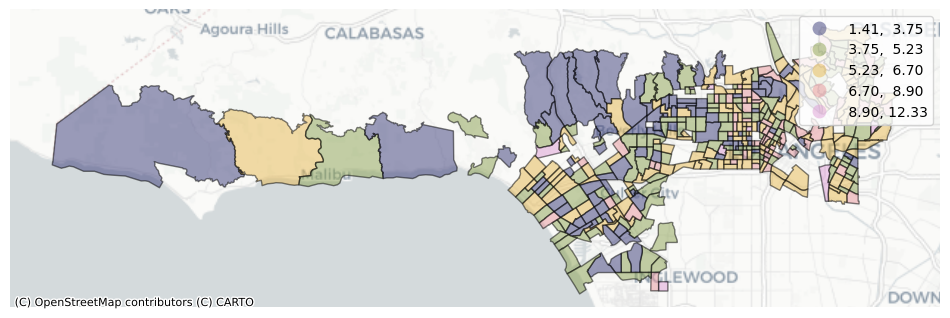

In [28]:
#map time! Let's visualize low birth weight among SPAs 4&5
import matplotlib.pyplot as plt
import contextily as ctx

lbw2 = lbw2.to_crs(epsg=3857)

ax = lbw2.plot(figsize=(12, 10),
              column='Low Birth Weight',
              legend=True, 
              scheme='NaturalBreaks',
              cmap='tab20b',
              alpha=0.5,  
              edgecolor='k')


# ax.set_xlim(minx - 1000, maxx + 1000)
# ax.set_ylim(miny - 1000, maxy + 1000)

#plt.title(" with Highest Levels of Low Birth Weight")#
ax.set_axis_off()

# Add the basemap. 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.show()

In [98]:
#I want to see which areas have the worst low birth weight so let's sort it
lbw_sorted = lbw2.sort_values(by='Low Birth Weight',ascending = False)

In [99]:
lbw_sorted[['Census Tract', 'County Statistical Area','SPA','Low Birth Weight']].head(10)

,Census Tract,County Statistical Area,SPA,Low Birth Weight
52,06037189903,Los Angeles - Hollywood,SPA 4 - Metro,12.33
55,06037190201,Los Angeles - Hollywood,SPA 4 - Metro,11.59
168,06037206050,Los Angeles - Wholesale District,SPA 4 - Metro,10.32
141,06037201601,Los Angeles - El Sereno,SPA 4 - Metro,10.24
294,06037264000,Los Angeles - Brentwood,SPA 5 - West,10.20
207,06037211320,Los Angeles - Wilshire Center,SPA 4 - Metro,10.16
235,06037212701,Los Angeles - Country Club Park,SPA 4 - Metro,10.09
367,06037277400,Los Angeles - Westchester,SPA 5 - West,10.00
71,06037191301,Los Angeles - East Hollywood,SPA 4 - Metro,8.90
223,06037212203,Los Angeles - Wilshire Center,SPA 4 - Metro,8.53


In [ ]:
#This list makes sense given that the worst low birth weights are in main cities in SPA 4.
#The only thing that stumps me is that Brentwood is here which I was not expecting.

<Axes: title={'center': 'Top 10 Census Tracts with Highest Proportion of Low Birth Weights'}, xlabel='County Statistical Area'>

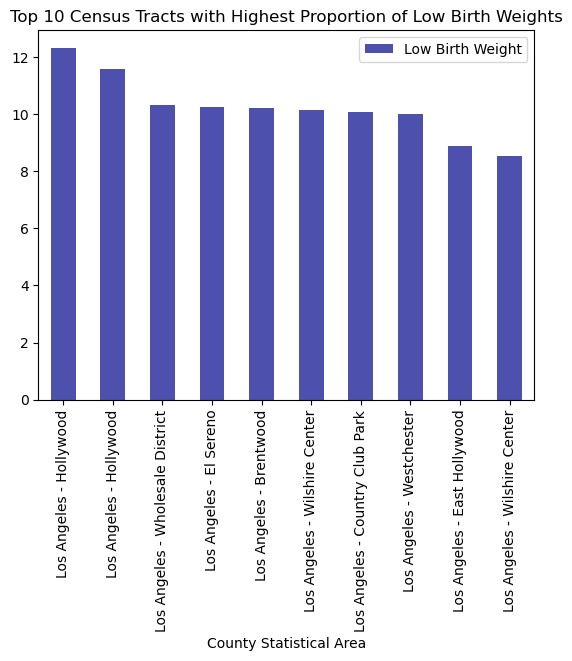

In [100]:
# I want to produce a chart, it might be helpful and easier to understand
lbw_sorted.head(10).plot.bar(x='County Statistical Area',
                            y='Low Birth Weight', 
                            title='Top 10 Census Tracts with Highest Proportion of Low Birth Weights',
                            color='#4E50AD')

In [101]:
#Now I want to clip this and make it into its own dataframe for my groupmates to use
filtered_highlbw = lbw_sorted.loc[lbw_sorted['Low Birth Weight'] > 8.52]

In [102]:
filtered_highlbw.info

<bound method DataFrame.info of      OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
52        452  189903  1899.03  9.037927e+05    4148.746180   
55        459  190201  1902.01  2.441733e+06    6951.861667   
168       582  206050  2060.50  1.921011e+07   25518.484734   
141       553  201601  2016.01  5.816822e+06   11118.841894   
294       928  264000  2640.00  2.010706e+07   22982.742080   
207       648  211320  2113.20  2.004977e+06    5674.508818   
235       676  212701  2127.01  5.054873e+06   10686.757287   
367      1044  277400  2774.00  6.877749e+06   10438.697565   
71        479  191301  1913.01  2.944231e+06    8542.864193   
223       664  212203  2122.03  1.144316e+06    4500.812926   

                                              geometry Census Tract  \
52   POLYGON ((-118.34589 34.10369, -118.34624 34.1...  06037189903   
55   POLYGON ((-118.32751 34.10541, -118.32768 34.1...  06037190201   
168  POLYGON ((-118.22041 34.02978, -118.22035 34.0...  06037

In [75]:
#New datafile!
filtered_highlbw.to_file("High_LBW_Data.geojson", driver='GeoJSON')

In [103]:
#Now let's look at the areas with lower levels of low birth weight
lbw_sorted2=lbw2.sort_values(by='Low Birth Weight',ascending= True)

In [104]:
lbw_sorted2[['Census Tract', 'County Statistical Area', 'SPA', 'Low Birth Weight']].head(10)

,Census Tract,County Statistical Area,SPA,Low Birth Weight
83,06037191902,Los Angeles - Melrose,SPA 4 - Metro,1.41
98,06037194401,Los Angeles - Melrose,SPA 4 - Metro,1.92
82,06037191901,Los Angeles - Melrose,SPA 4 - Metro,2.05
179,06037208501,Los Angeles - Historic Filipinotown,SPA 4 - Metro,2.10
49,06037189400,Los Angeles - Hollywood Hills,SPA 4 - Metro,2.17
95,06037194102,Los Angeles - Hollywood Hills,SPA 4 - Metro,2.23
284,06037261102,Los Angeles - Beverly Crest,SPA 5 - West,2.24
229,06037212410,Los Angeles - Koreatown,SPA 4 - Metro,2.24
101,06037195100,Los Angeles - Silverlake,SPA 4 - Metro,2.25
340,06037272202,Los Angeles - Mar Vista,SPA 5 - West,2.27


In [ ]:
#This list also makes sense to me given that most of these areas are affluent and white. However, I wish I saw more of SPA 5 in this list as that was my prediction 

<Axes: title={'center': 'Top 10 Census Tracts with Lowest Proportion of Low Birth Weights'}, xlabel='County Statistical Area'>

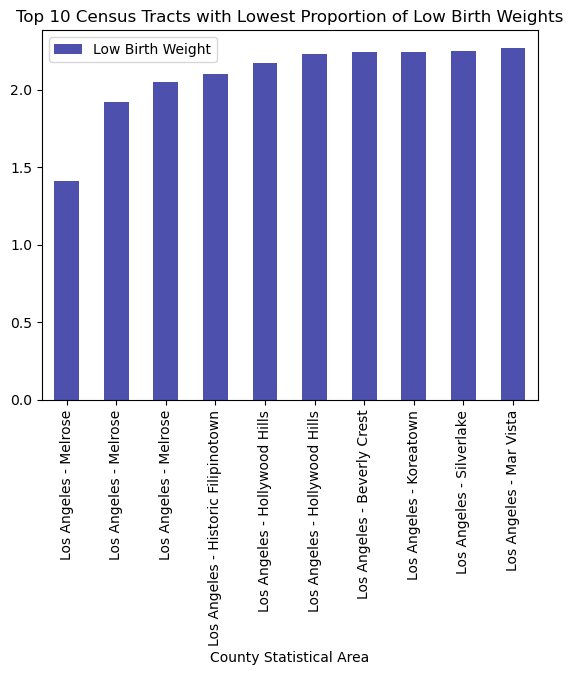

In [105]:
#Creating the same chart with the lower levels of low birth weight
lbw_sorted2.head(10).plot.bar(x='County Statistical Area',
                            y='Low Birth Weight', 
                            title='Top 10 Census Tracts with Lowest Proportion of Low Birth Weights',
                            color='#4E50AD')

In [106]:
#Now I want to clip this data and make it into its own dataframe for my groupmates to use
filtered_lowlbw = lbw_sorted2.loc[lbw_sorted2['Low Birth Weight'] < 2.28]

In [107]:
filtered_lowlbw.info

<bound method DataFrame.info of      OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
83        491  191902  1919.02  7.817628e+06   11569.812031   
98        506  194401  1944.01  5.013242e+06    9747.518611   
82        490  191901  1919.01  8.322073e+06   11883.439440   
179       614  208501  2085.01  2.617928e+06    6561.569834   
49        443  189400  1894.00  1.557287e+07   29227.415756   
95        503  194102  1941.02  3.771023e+07   38288.155499   
284       912  261102  2611.02  8.559360e+07   56704.291842   
229       670  212410  2124.10  1.691953e+06    5550.696624   
101       509  195100  1951.00  2.040087e+07   21728.676988   
340      1005  272202  2722.02  3.332334e+06    8785.831820   

                                              geometry Census Tract  \
83   POLYGON ((-118.34161 34.08709, -118.34279 34.0...  06037191902   
98   POLYGON ((-118.36328 34.08898, -118.36380 34.0...  06037194401   
82   POLYGON ((-118.34047 34.09438, -118.34099 34.0...  06037

In [108]:
#new dataframe! This is for low levels of low birth weight
filtered_lowlbw.to_file("Low_LBW_Data.geojson", driver='GeoJSON')

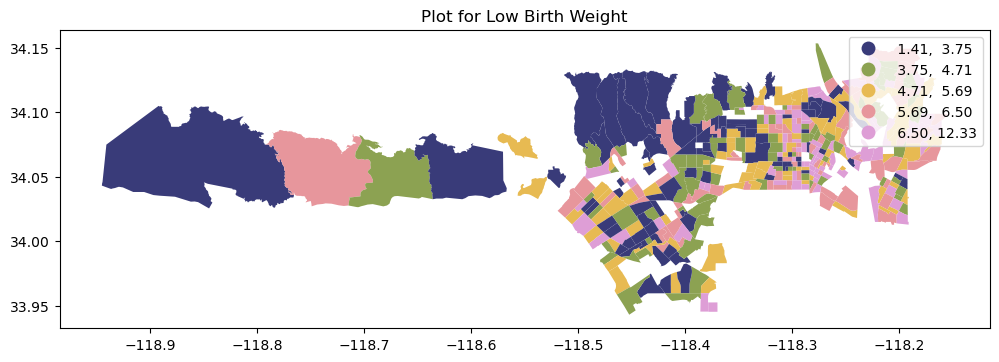

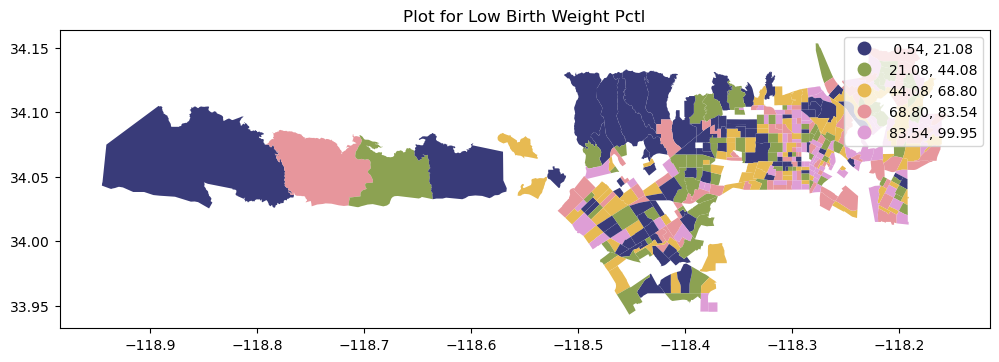

In [27]:
#Wanted to run this map one more time just in case we wanted to use this one that is more opaque
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ['Low Birth Weight', 'Low Birth Weight Pctl']

# Loop through each column and plot
for column_name in columns_to_plot:
    lbw2.plot(figsize=(12,10),
              column=column_name,
              legend=True, 
              scheme='quantiles',
              cmap='tab20b')
    plt.title(f'Plot for {column_name}')
    plt.show()


# End of Savannah Gourley's notebook
# My clipped dataframes will now be used amongst my other group members to further help with their analysis. 